<a href="https://colab.research.google.com/github/fahmiyansyah/Machine_Learning/blob/main/midTerm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Method 1

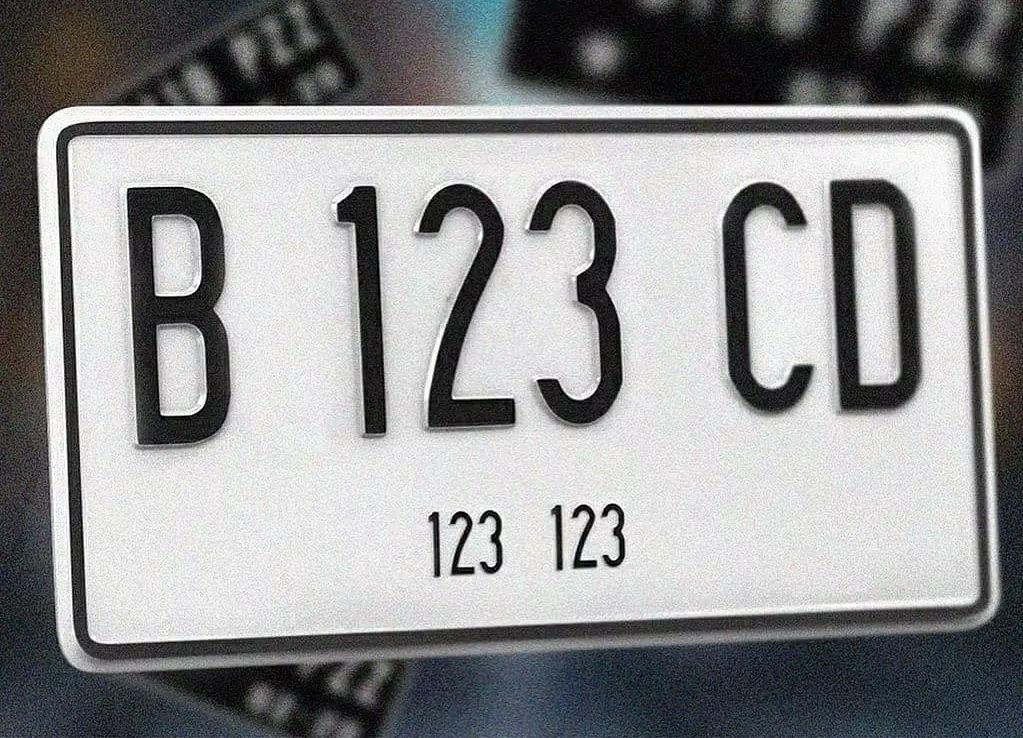

738
1023
3


(754974, 3)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
# Load The Image
img = cv.imread('/content/019_jpg.rf.e73938ec62074bbde822f7d5a084bdef.jpg')

# Show image
# cv2.imshow(img)
cv2_imshow(img) # only for google colab (due to issue in cv2.imshow)
# plt.axis('off')  # Hide the axis
# plt.show()

h, w, ch= img.shape
print(h)
print(w)
print(ch)

data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

In [14]:
%matplotlib inline


In [15]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

    plot_pixels(data, title='Input color space: 16 million possible colors')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


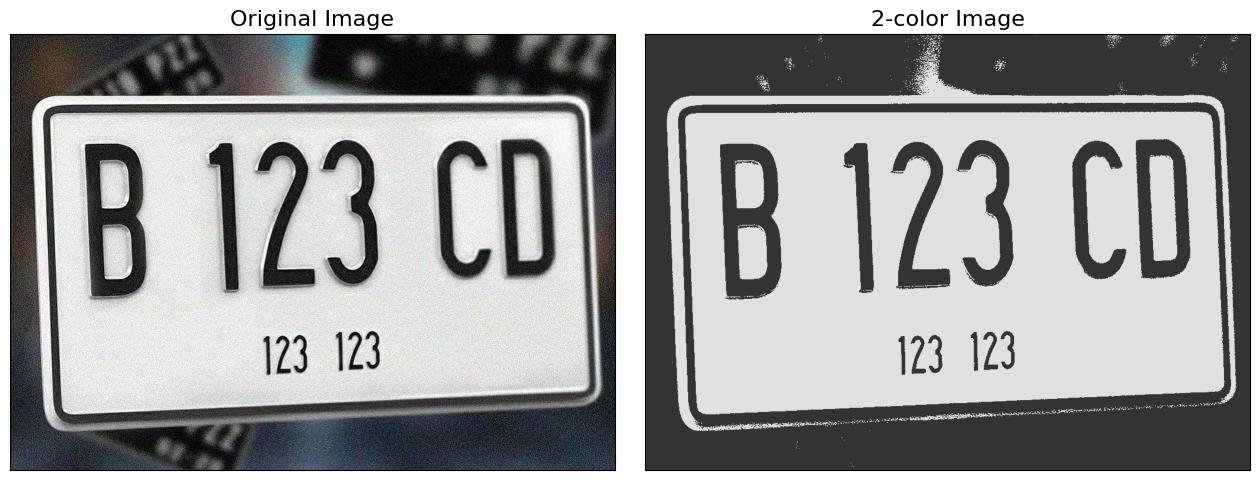

In [20]:
# Perform K-Means clustering to reduce colors
from sklearn.cluster import KMeans

K = 2  # Number of clusters
kmeans = KMeans(n_clusters=K, random_state=0).fit(data)
new_colors = kmeans.cluster_centers_[kmeans.labels_]

# Reshape the recolored data
img_recolored = (new_colors * 255).astype(np.uint8).reshape(img.shape)

# Display the original and recolored images
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(img_recolored, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)
plt.show()


Evaluate

In [30]:
from sklearn.metrics import silhouette_score

# Evaluate the quality of clustering using silhouette score
silhouette_avg = silhouette_score(data, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Calculate the within-cluster sum of squares (WCSS)
wcss = sum(np.min(kmeans.transform(data), axis=1))

print(f"Within-Cluster Sum of Squares (WCSS): {wcss:.2f}")


Silhouette Score: 0.68
Within-Cluster Sum of Squares (WCSS): 15040.02


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


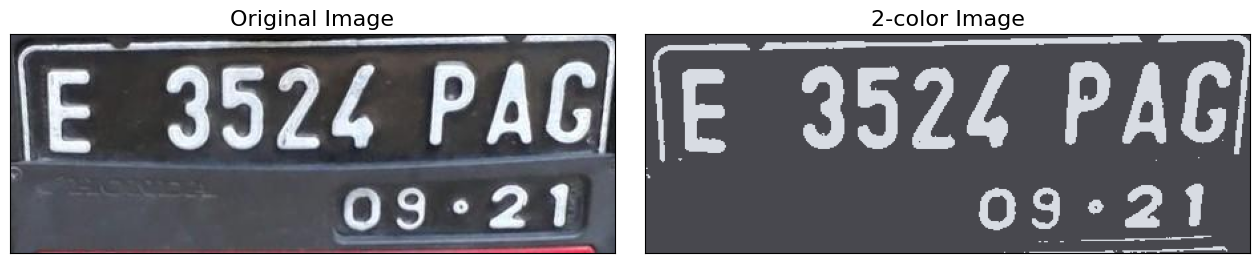

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


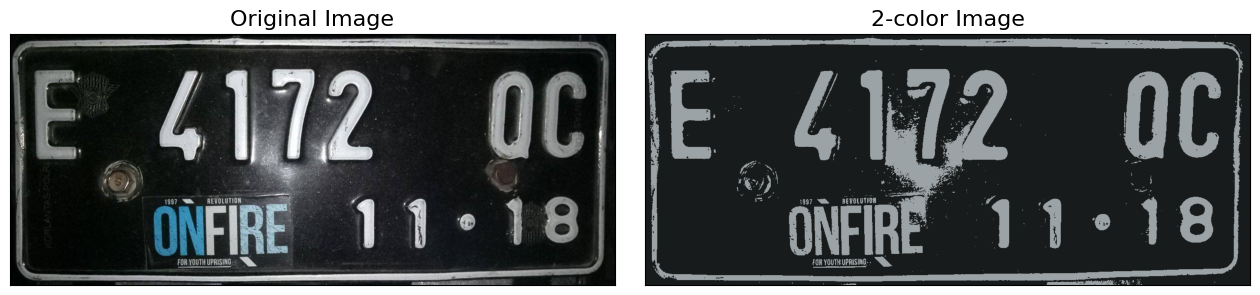

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


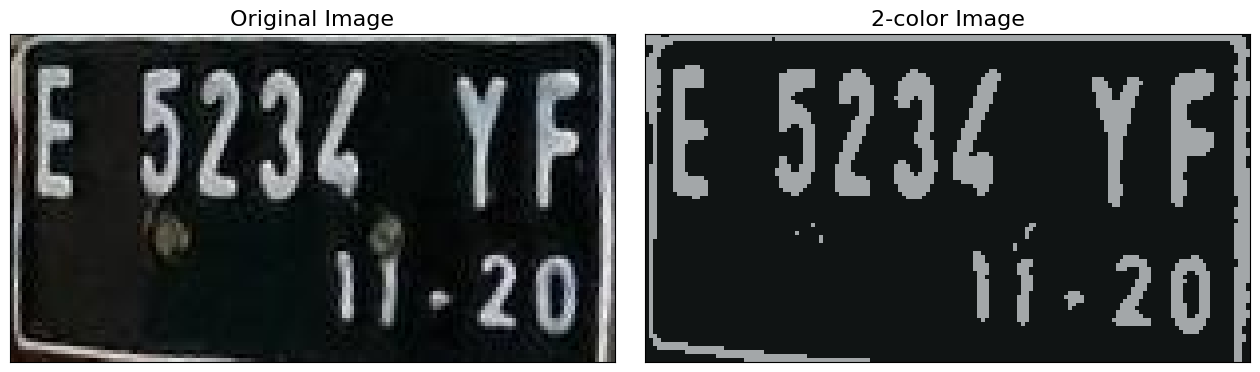

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


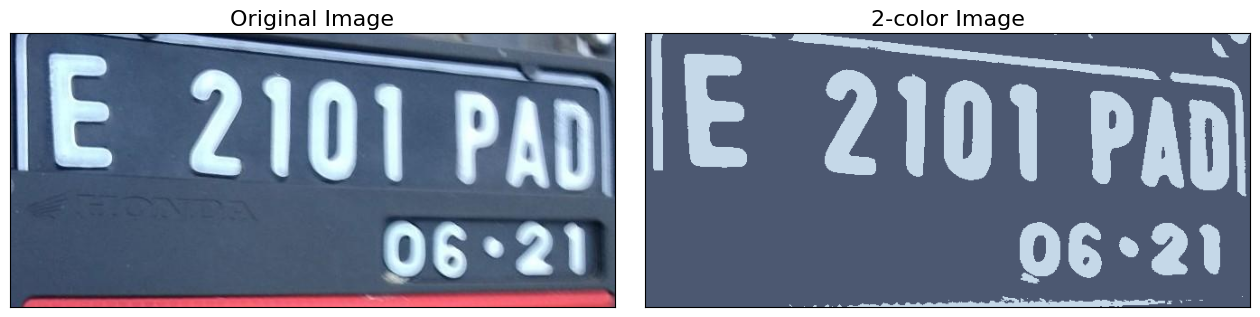

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


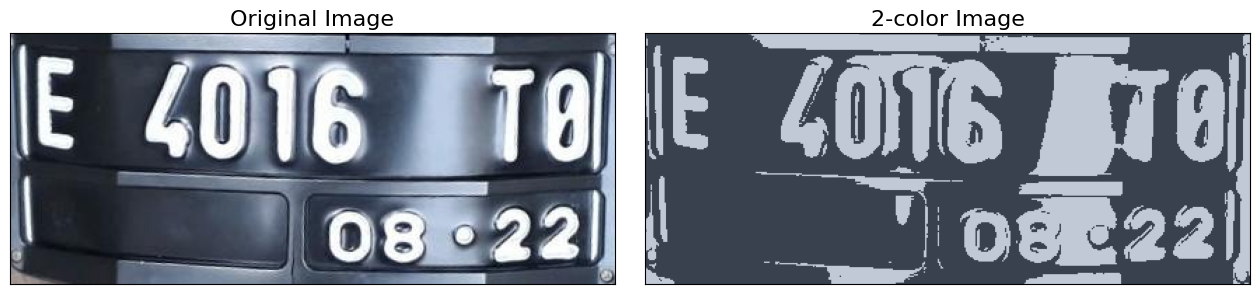

In [25]:
# Define a list of image file paths
image_paths = [
    '/content/27-E-3524-PAG-09-21_jpeg.rf.e30aee9dd8939945334bd78eabb7501e.jpg',
    '/content/17-E-4172-QC-11-18_jpg.rf.242a2fe2326bfdc57b7473d7a998c351.jpg',
    '/content/22-E-5234-YF-11-20_jpeg.rf.4e1ab567405d90ef53329797f1f6dab5.jpg',
    '/content/25-E-2101-PAD-06-21_jpeg.rf.fb688472f5ba9c0c445f9d9330f39508.jpg',
    '/content/26-E-4016-TO-08-22_jpeg.rf.8c72fd54437debb496cef33f54cfd44a.jpg'
]

# Define the number of clusters (K)
K = 2

for image_path in image_paths:
    # Load the image
    img = cv.imread(image_path)

    h, w, ch = img.shape

    data = img / 255.0
    data = data.reshape(h * w, ch)

    # Perform K-Means clustering to reduce colors
    kmeans = KMeans(n_clusters=K, random_state=0).fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.labels_]

    # Reshape the recolored data
    img_recolored = (new_colors * 255).astype(np.uint8).reshape(img.shape)

    # Display the original and recolored images
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(cv2.cvtColor(img_recolored, cv2.COLOR_BGR2RGB))
    ax[1].set_title('2-color Image', size=16)
    plt.show()

### Method 2



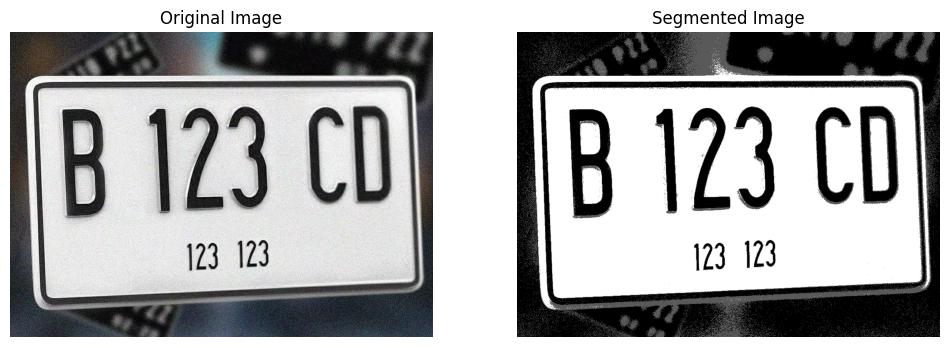

In [27]:
# Load the license plate image
image_path = '/content/019_jpg.rf.e73938ec62074bbde822f7d5a084bdef.jpg'
original_image = cv2.imread(image_path)

# Convert the image to grayscale (you can choose a different color space if needed)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply K-Means clustering to segment the license plate
# You can adjust the number of clusters (K) based on your specific image
K = 3  # Number of clusters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(gray_image.reshape(-1, 1).astype(np.float32), K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
segmented_image = centers[labels.flatten()].reshape(gray_image.shape)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Image")
plt.axis('off')

plt.show()

Evaluate

In [28]:
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error

# Load the original license plate image (in grayscale)
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert the segmented image to grayscale
segmented_image_gray = segmented_image.astype(np.uint8)

# Calculate SSIM
ssim_score = ssim(original_image, segmented_image_gray)

# Calculate MSE
mse = mean_squared_error(original_image, segmented_image_gray)

print(f"SSIM: {ssim_score:.2f}")
print(f"MSE: {mse:.2f}")

SSIM: 0.46
MSE: 84.83


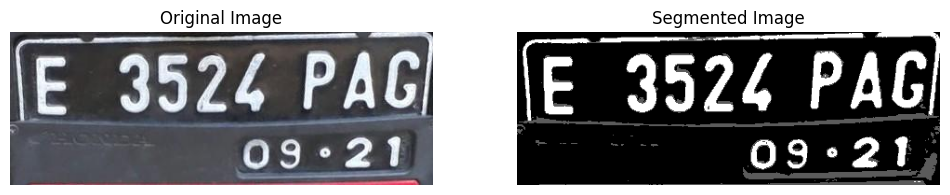

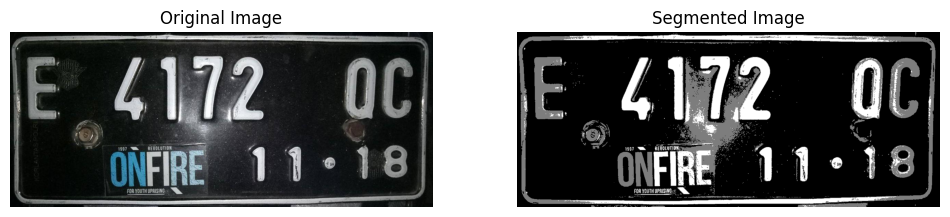

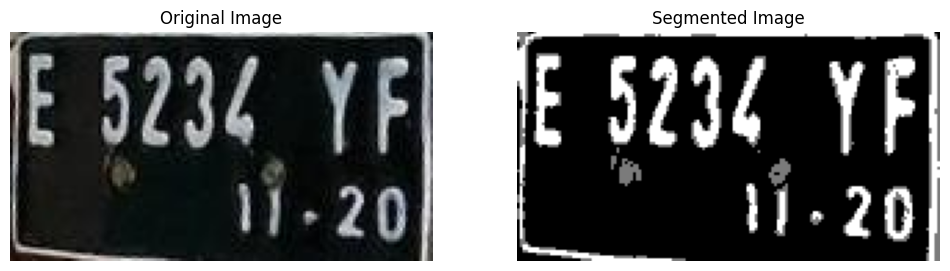

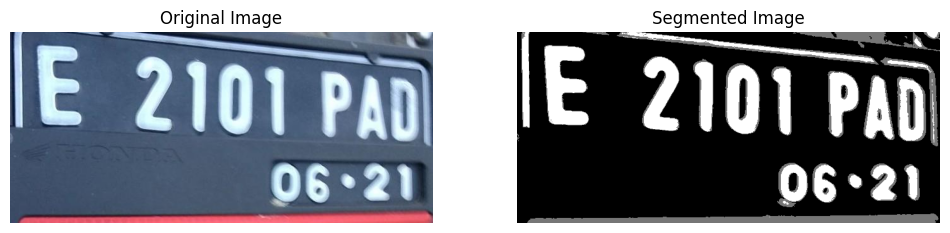

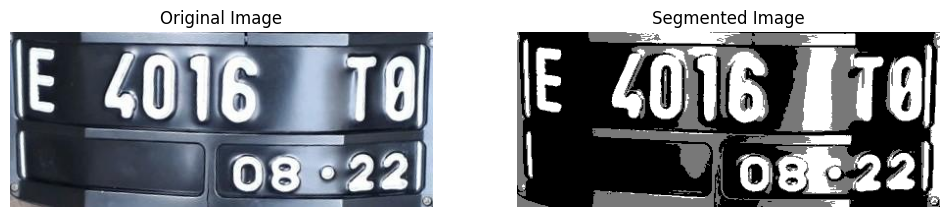

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define a list of image file paths
image_paths = [
    '/content/27-E-3524-PAG-09-21_jpeg.rf.e30aee9dd8939945334bd78eabb7501e.jpg',
    '/content/17-E-4172-QC-11-18_jpg.rf.242a2fe2326bfdc57b7473d7a998c351.jpg',
    '/content/22-E-5234-YF-11-20_jpeg.rf.4e1ab567405d90ef53329797f1f6dab5.jpg',
    '/content/25-E-2101-PAD-06-21_jpeg.rf.fb688472f5ba9c0c445f9d9330f39508.jpg',
    '/content/26-E-4016-TO-08-22_jpeg.rf.8c72fd54437debb496cef33f54cfd44a.jpg'
]

# Define the number of clusters (K)
K = 3  # Number of clusters

for image_path in image_paths:
    # Load the license plate image
    original_image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply K-Means clustering to segment the license plate
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(gray_image.reshape(-1, 1).astype(np.float32), K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    segmented_image = centers[labels.flatten()].reshape(gray_image.shape)

    # Display the original and segmented images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image, cmap='gray')
    plt.title("Segmented Image")
    plt.axis('off')

    plt.show()
